In [57]:
import pandas as pd
sleep_df = pd.read_csv("/content/sleep_data.csv")
sleep_df['Prev_Datetime'] = pd.to_datetime(sleep_df['Prev_Datetime'])
sleep_df['Next_Datetime'] = pd.to_datetime(sleep_df['Next_Datetime'])


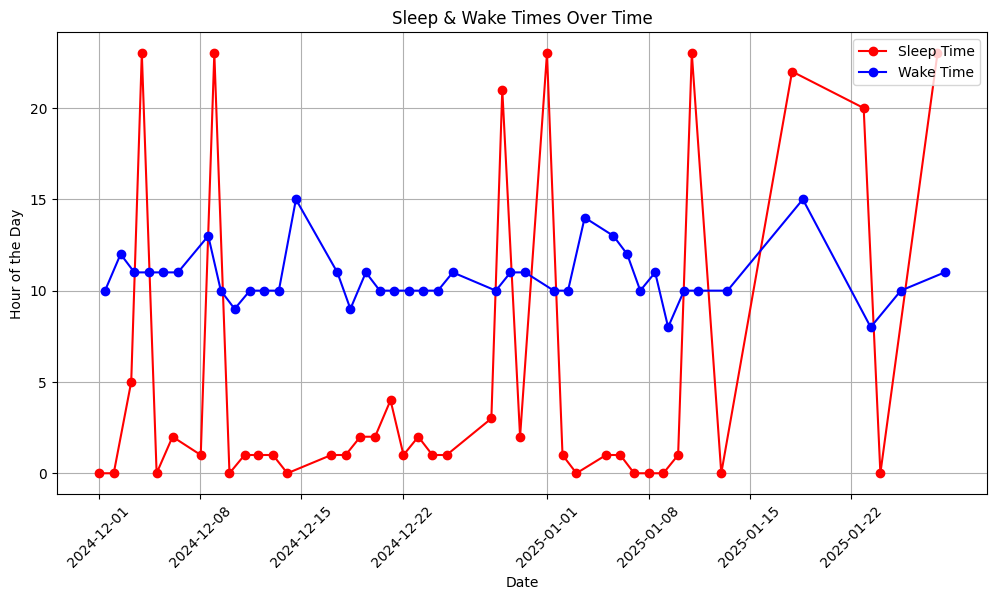

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
plt.plot(sleep_df['Prev_Datetime'], sleep_df['Prev_Datetime'].dt.hour, 'ro-', label="Sleep Time")
plt.plot(sleep_df['Next_Datetime'], sleep_df['Next_Datetime'].dt.hour, 'bo-', label="Wake Time")

plt.xlabel("Date")
plt.ylabel("Hour of the Day")
plt.title("Sleep & Wake Times Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

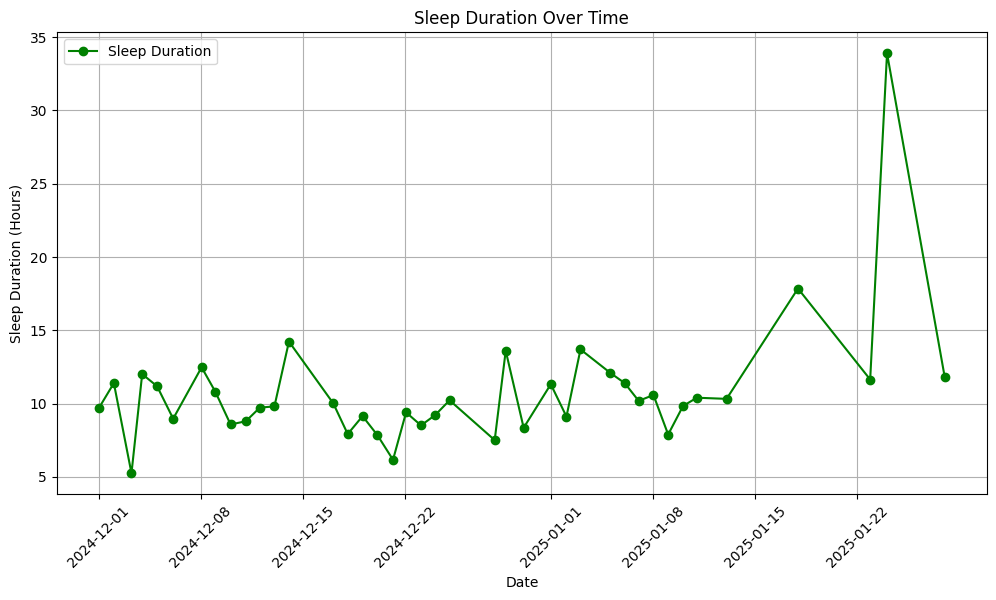

In [59]:
plt.figure(figsize=(12, 6))
sleep_df['Sleep Duration (hours)'] = (sleep_df['Next_Datetime'] - sleep_df['Prev_Datetime']).dt.total_seconds() / 3600
plt.plot(sleep_df['Prev_Datetime'], sleep_df['Sleep Duration (hours)'], 'go-', label="Sleep Duration")

plt.xlabel("Date")
plt.ylabel("Sleep Duration (Hours)")
plt.title("Sleep Duration Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

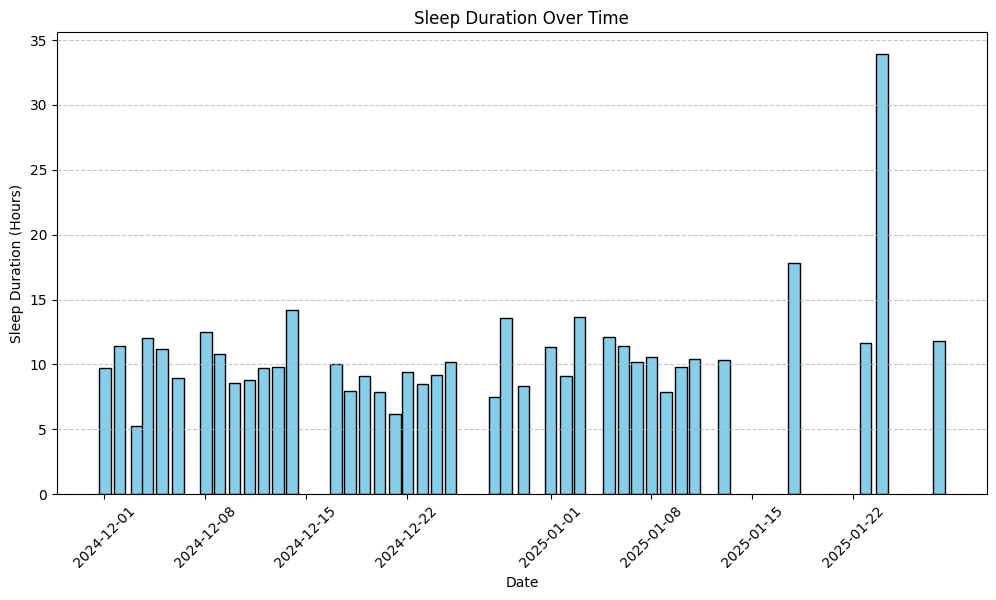

In [60]:
plt.figure(figsize=(12, 6))
plt.bar(sleep_df['Prev_Datetime'], sleep_df['Sleep Duration (hours)'], color='skyblue', edgecolor='black')

plt.xlabel("Date")
plt.ylabel("Sleep Duration (Hours)")
plt.title("Sleep Duration Over Time")
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

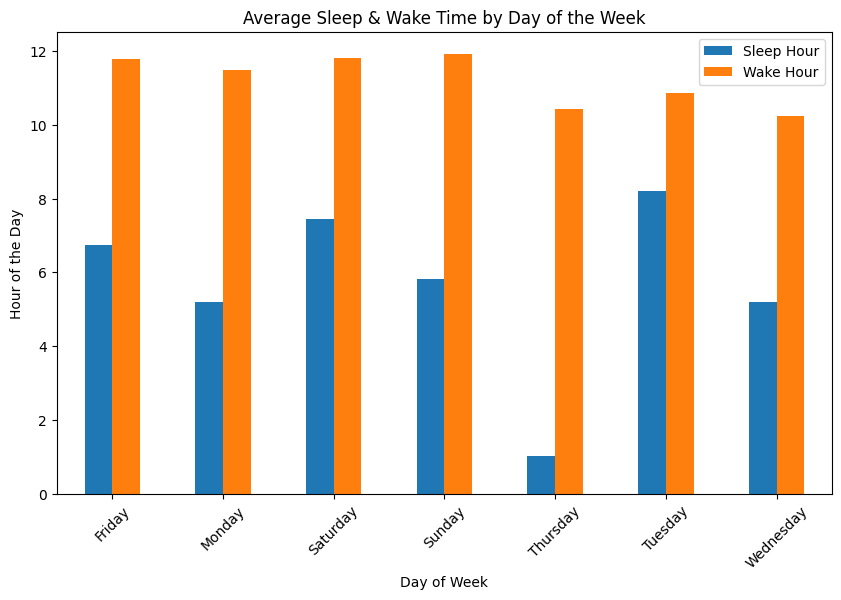

In [61]:
sleep_df['Day of Week'] = sleep_df['Prev_Datetime'].dt.day_name()
sleep_df['Sleep Hour'] = sleep_df['Prev_Datetime'].dt.hour + sleep_df['Prev_Datetime'].dt.minute / 60
sleep_df['Wake Hour'] = sleep_df['Next_Datetime'].dt.hour + sleep_df['Next_Datetime'].dt.minute / 60

weekly_avg = sleep_df.groupby("Day of Week")[['Sleep Hour', 'Wake Hour']].mean()

weekly_avg.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title("Average Sleep & Wake Time by Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()

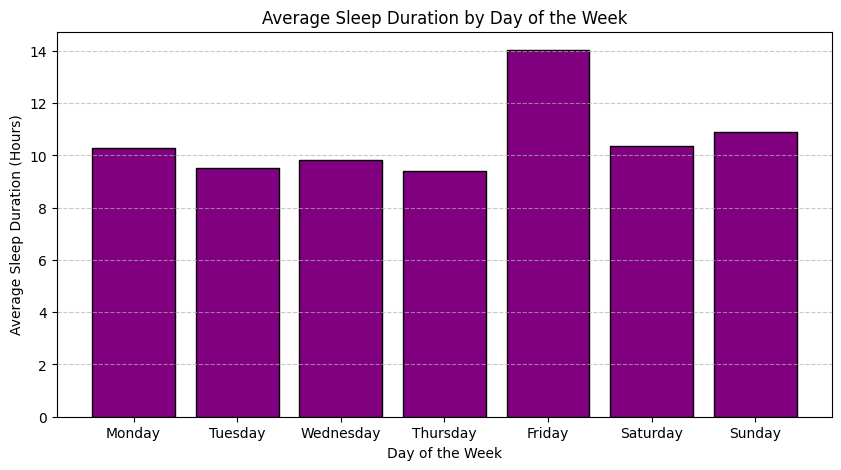

In [62]:
sleep_df['Day of Week'] = sleep_df['Prev_Datetime'].dt.day_name()

# Calculate average sleep duration per day
weekly_avg = sleep_df.groupby("Day of Week")['Sleep Duration (hours)'].mean()

# Sort by weekday order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_avg = weekly_avg.reindex(ordered_days)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(weekly_avg.index, weekly_avg, color='purple', edgecolor='black')

plt.xlabel("Day of the Week")
plt.ylabel("Average Sleep Duration (Hours)")
plt.title("Average Sleep Duration by Day of the Week")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

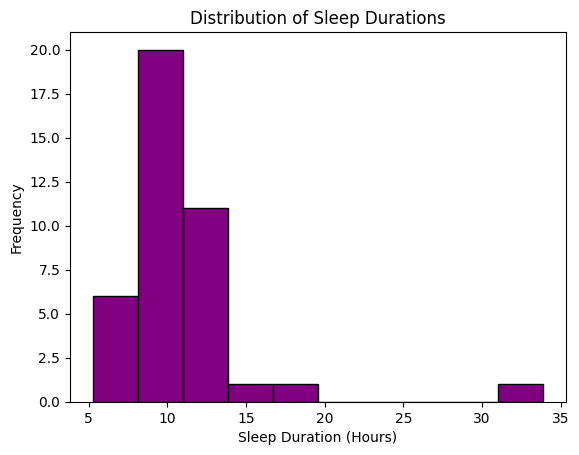

In [63]:
plt.hist(sleep_df['Sleep Duration (hours)'], bins=10, color='purple', edgecolor='black')
plt.xlabel("Sleep Duration (Hours)")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Durations")
plt.show()

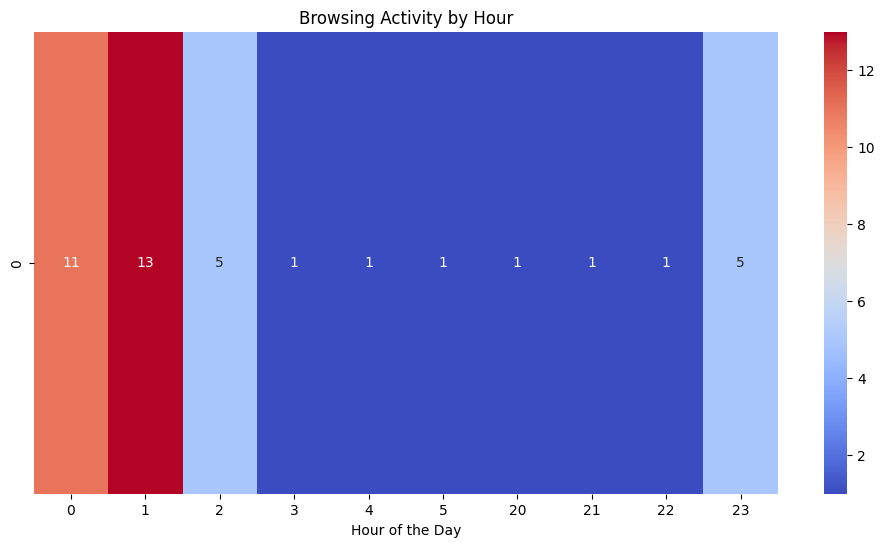

In [64]:
import seaborn as sns
import numpy as np

# Extract hour from timestamps
sleep_df['Hour'] = sleep_df['Prev_Datetime'].dt.hour

# Count browsing activity per hour
hourly_activity = sleep_df.groupby('Hour').size()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_activity.values.reshape(1, -1), cmap="coolwarm", annot=True, xticklabels=hourly_activity.index)

plt.xlabel("Hour of the Day")
plt.title("Browsing Activity by Hour")
plt.show()

In [65]:
sleep_df_truth = pd.read_csv("/content/Sleep Schedule Truth - Sheet1.csv")
sleep_df_truth['Wake Time'] = pd.to_datetime(sleep_df_truth['Wake Time'])
sleep_df_truth['Sleep Time'] = pd.to_datetime(sleep_df_truth['Sleep Time'])
sleep_df_truth['Date'] = pd.to_datetime(sleep_df_truth['Date']).dt.date

# Merge based on 'Date'
sleep_df['Date'] = sleep_df['Prev_Datetime'].dt.date
merged_df = pd.merge(sleep_df, sleep_df_truth, on='Date')

def time_to_float(t):
    return t.hour + t.minute / 60  # Convert HH:MM to float hours


merged_df["Predicted Sleep Time"] = merged_df["Prev_Datetime"].apply(time_to_float)
merged_df["Predicted Wake Time"] = merged_df["Next_Datetime"].apply(time_to_float)
merged_df["Actual Sleep Time"] = merged_df["Sleep Time"].apply(time_to_float)
merged_df["Actual Wake Time"] = merged_df["Wake Time"].apply(time_to_float)



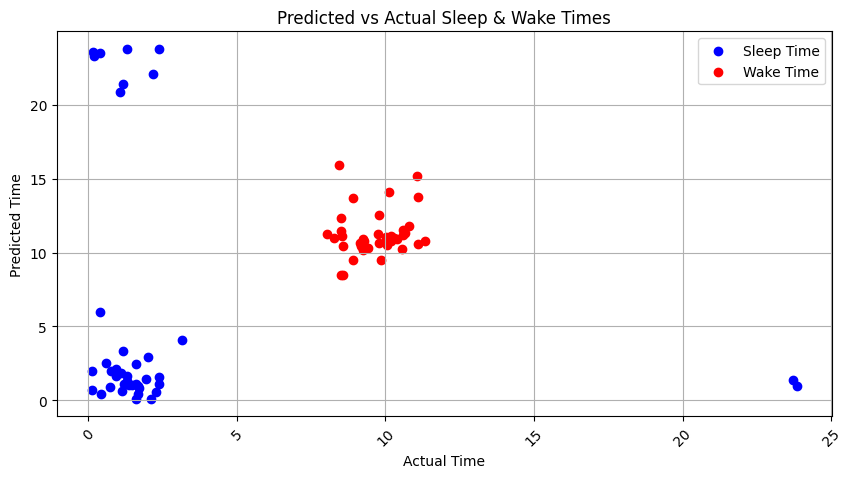

In [66]:

plt.figure(figsize=(10,5))

plt.scatter(merged_df['Actual Sleep Time'], merged_df['Predicted Sleep Time'], color='blue', label="Sleep Time")
plt.scatter(merged_df['Actual Wake Time'], merged_df['Predicted Wake Time'], color='red', label="Wake Time")

plt.xlabel("Actual Time")
plt.ylabel("Predicted Time")
plt.title("Predicted vs Actual Sleep & Wake Times")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [67]:
def time_to_minutes(t):
    """Convert datetime.time to total minutes since midnight."""
    return t.hour * 60 + t.minute

def circular_time_difference(t1, t2):
    """Compute the shortest difference between two times, considering wraparound at midnight."""
    diff = abs(time_to_minutes(t1) - time_to_minutes(t2))
    return min(diff, 1440 - diff)  # 1440 minutes in a day

# Compute absolute errors for each row
merged_df['Absolute Error (min)'] = merged_df.apply(lambda row: circular_time_difference(row['Sleep Time'], row['Prev_Datetime']), axis=1)

# Compute Mean Absolute Error (MAE)
mae = merged_df['Absolute Error (min)'].mean()
print(f"Mean Absolute Error (MAE) for Sleep Time: {mae:.2f} minutes")


# Compute absolute errors for each row
merged_df['Absolute Error (min)'] = merged_df.apply(lambda row: circular_time_difference(row['Wake Time'], row['Next_Datetime']), axis=1)

# Compute Mean Absolute Error (MAE)
mae = merged_df['Absolute Error (min)'].mean()
print(f"Mean Absolute Error (MAE) for Wake Time: {mae:.2f} minutes")


Mean Absolute Error (MAE) for Sleep Time: 79.15 minutes
Mean Absolute Error (MAE) for Wake Time: 99.12 minutes


 A linear graph/timeline for sleep time linear timeline/graph doesn't allow for good demonstration of the values remaining clumped along the same place. Mean wake time error and mean sleep time error still kind of higher than expected, but relatively clumped/linear. Values show that predictions differ by an hour on average.

In [68]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test
w_stat, p_value = wilcoxon(merged_df['Actual Sleep Time'], merged_df['Predicted Sleep Time'])

print(f"Wilcoxon signed-rank test results:\nW-statistic = {w_stat:.3f}, P-value = {p_value:.5f}")

# Perform Wilcoxon signed-rank test
w_stat, p_value = wilcoxon(merged_df['Actual Wake Time'], merged_df['Predicted Wake Time'])

print(f"Wilcoxon signed-rank test results:\nW-statistic = {w_stat:.3f}, P-value = {p_value:.5f}")


median_diff = (merged_df['Actual Sleep Time'] - merged_df['Predicted Sleep Time']).median()
print(f"Median Difference: {median_diff:.2f} hours") # since median difference is negative, the predictions underestimate sleep time

median_diff = (merged_df['Actual Wake Time'] - merged_df['Predicted Wake Time']).median()
print(f"Median Difference: {median_diff:.2f} hours") # since median difference is negative, predictions overestimate wake time

Wilcoxon signed-rank test results:
W-statistic = 250.000, P-value = 0.08054
Wilcoxon signed-rank test results:
W-statistic = 22.500, P-value = 0.00000
Median Difference: -0.42 hours
Median Difference: -1.01 hours


Sleep time predictions: Not statistically different, so predictions are mildly accurate (p-val = 0.08 > 0.05). Median difference is negative, so predictions underestimate sleep time, but is fairly close to 0 so not bad

Wake time predictions: Statistically different, so predictions aren't as accurate (p-val = 0.00). Median difference is negative so predictions underestimate wake time, but isn't too far from 0 so not bad again

